

---
**Assignment - Week 9**


---
*Christopher Mena - CAI2840C*






---


**IMPORTS**


---




In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype = np.float32) / kernel_size**2




---
**1A. Image filter or Edge detection techniques**  (one)


---


For our first technique, we will use Box blur as an image filter, referenced from the provided notebook as instructed.   The purpose here is to show computational work and understanding of the concepts, to test and validate them. Though the code itself will be completed in Cursor and doesn't really carry over from Colab  (for example, Colab doesn't allow cv2 imshow...  so we have to use matplotlib, which is not going to carry over)



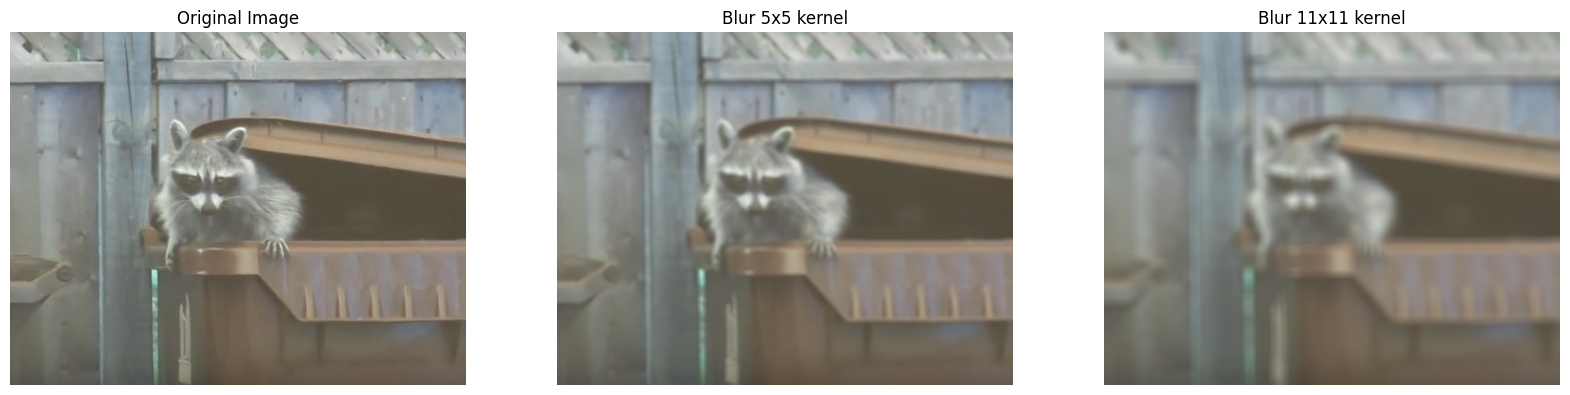

In [12]:
image1 = cv2.imread('/content/racc2.jpg')

# Kernel size 5.
box_blur1 = cv2.blur(image1, (5,5))

# Kernel size 11.
box_blur2 = cv2.blur(image1, (11,11))

# Display.
plt.figure(figsize = (20, 10))
plt.subplot(131); plt.axis('off'); plt.imshow(image1); plt.title("Original Image")
plt.subplot(132); plt.axis('off'); plt.imshow(box_blur1); plt.title('Blur 5x5 kernel')
plt.subplot(133); plt.axis('off'); plt.imshow(box_blur2); plt.title('Blur 11x11 kernel');



---
**1B. Image filter or Edge detection techniques**  (two)


---
For our second technique, we will use Canny edge detection, as referenced in the provided notebook.



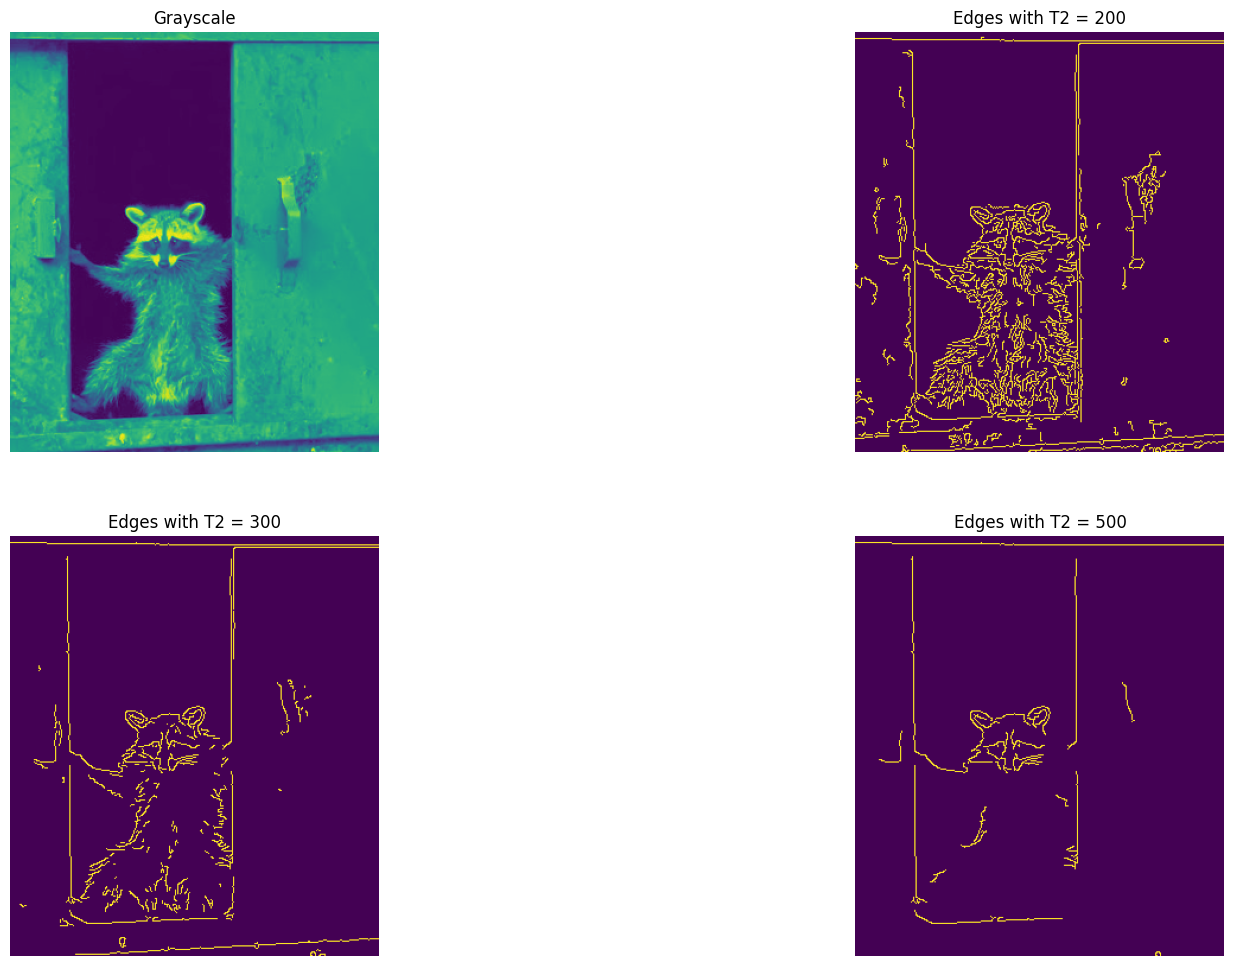

In [9]:
image2 = cv2.imread('/content/racc3.jpg')

# Grayscale.
img_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

edges1 = cv2.Canny(img_gray, threshold1 = 100, threshold2 = 200)
edges2 = cv2.Canny(img_gray, threshold1 = 200, threshold2 = 300)
edges3 = cv2.Canny(img_gray, threshold1 = 200, threshold2 = 500)

plt.figure(figsize = (20,12))
plt.subplot(221); plt.axis("off"); plt.imshow(img_gray);  plt.title('Grayscale')
plt.subplot(222); plt.axis("off"); plt.imshow(edges1);    plt.title('Edges with T2 = 200')
plt.subplot(223); plt.axis("off"); plt.imshow(edges2);    plt.title('Edges with T2 = 300')
plt.subplot(224); plt.axis("off"); plt.imshow(edges3);    plt.title('Edges with T2 = 500');




---
**2. Creativity and Originality**   **-- BONUS!**


---
In this section, we will implement a pre-trained model for raccoon object detection in images.  




In [ ]:
!pip install ultralytics

from ultralytics import YOLO



image 1/1 /content/racc1.jpg: 416x640 1 cat, 425.5ms
Speed: 4.0ms preprocess, 425.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


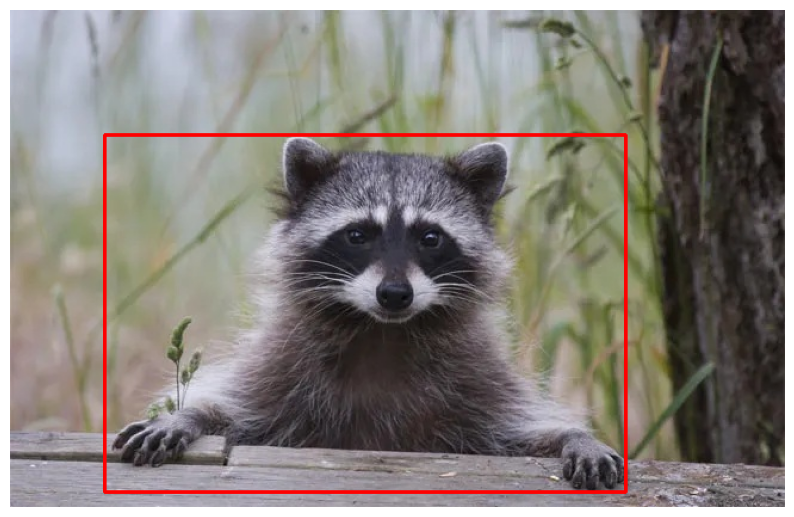

In [10]:
model = YOLO('/content/yolov8s.pt')
image_path = '/content/racc1.jpg'
img = cv2.imread(image_path)

# Run inference
results = model.predict(source=image_path, conf=0.6)

# Convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw bounding boxes
for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    img_rgb = cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Draw the box (red color)

# Display image
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()